*In this project, we have used Cardiovascular Disease dataset from kaggle. Based on some health conditions of an individual.*

**Our model will predict whether he/she has any cardiovascular disease or not.**

Features:

*   Age | Objective Feature | age | int (days)

*   Height | Objective Feature | height | int (cm) |

*   Weight | Objective Feature | weight | float (kg) |

*   Gender | Objective Feature | gender | categorical code |

*   Systolic blood pressure | Examination Feature | ap_hi | int |

*   Diastolic blood pressure | Examination Feature | ap_lo | int |

*   Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

*   Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

*   Smoking | Subjective Feature | smoke | binary |

*   Alcohol intake | Subjective Feature | alco | binary |

*   Physical activity | Subjective Feature | active | binary |

*   Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



# Importing Libraries

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
# Loading data
df = pd.read_csv('/content/cardio_train.csv',sep=';')
# Check the data
df_names = df
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25072 entries, 0 to 25071
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           25072 non-null  int64  
 1   age          25072 non-null  int64  
 2   gender       25072 non-null  int64  
 3   height       25072 non-null  int64  
 4   weight       25072 non-null  float64
 5   ap_hi        25072 non-null  int64  
 6   ap_lo        25072 non-null  int64  
 7   cholesterol  25071 non-null  float64
 8   gluc         25071 non-null  float64
 9   smoke        25071 non-null  float64
 10  alco         25071 non-null  float64
 11  active       25071 non-null  float64
 12  cardio       25071 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.5 MB


## Modifying data

In [3]:
df_names = df_names.drop("id", axis=1)
df_names.age = np.round(df_names.age/365.25,decimals=1)
df_names.gender = df_names.gender.replace(2,0)
df_names.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,0,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,55.4,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,51.6,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,48.2,0,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,47.8,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0


## Checking data if there is any null value exists

In [4]:
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol     True
gluc            True
smoke           True
alco            True
active          True
cardio          True
dtype: bool

## Identifying gender from height and weight

In [5]:
a = df_names[df_names["gender"]==0]["height"].mean()
b = df_names[df_names["gender"]==1]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender:0 is "+ gender +" & Gender:1 is " + gender1)

Gender:0 is male & Gender:1 is female


## Checking blood pressure ranges

In [6]:
df_names= df_names[(df_names['ap_lo']<360) & (df_names['ap_hi']<360)].copy()
df_names= df_names[(df_names['ap_lo']>20) & (df_names['ap_hi']>20)].copy()
data=df_names[df_names['ap_hi']>df_names['ap_lo']]

### Systolic Blood pressure

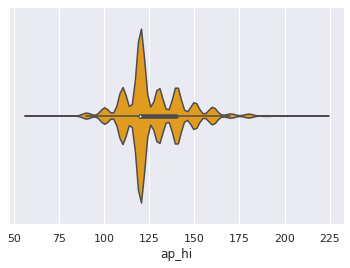

In [7]:
sns.violinplot(data.ap_hi,color='orange');

### Diastolic Blood pressure

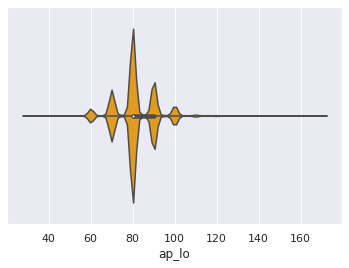

In [8]:
sns.violinplot(data.ap_lo,color='orange');

## Saving modified data

In [9]:
df_names

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.4,0,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,55.4,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,51.6,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,48.2,0,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,47.8,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25066,50.0,0,156,59.0,120,80,1.0,1.0,1.0,0.0,1.0,0.0
25067,52.3,1,159,59.0,120,80,1.0,1.0,0.0,0.0,1.0,1.0
25068,46.1,0,175,86.0,140,80,2.0,1.0,1.0,0.0,1.0,1.0
25069,53.6,1,162,68.0,110,60,3.0,1.0,0.0,0.0,1.0,1.0


In [10]:
df_copy = pd.DataFrame(data) 
  
# saving the dataframe 
df_copy.to_csv('file1.csv') 

## Handling non-numeric data

In [11]:
x = df_names.iloc[:,:-1]

In [12]:
y = df_names.iloc[:,-1]

In [13]:
def handle_non_numerical_data(df):
    
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [14]:
Xfeatures = handle_non_numerical_data(x)
Xfeatures

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.4,0,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0
1,55.4,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0
2,51.6,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0
3,48.2,0,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0
4,47.8,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
25066,50.0,0,156,59.0,120,80,1.0,1.0,1.0,0.0,1.0
25067,52.3,1,159,59.0,120,80,1.0,1.0,0.0,0.0,1.0
25068,46.1,0,175,86.0,140,80,2.0,1.0,1.0,0.0,1.0
25069,53.6,1,162,68.0,110,60,3.0,1.0,0.0,0.0,1.0


# Train-Test split 80% - 20%

*   Train data = 80 %

*   Test data = 20 %

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xfeatures, y, test_size=0.20, random_state=10)

In [16]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
2106,64.2,0,165,62.0,120,80,3.0,3.0,0.0,0.0,0.0
6744,51.9,1,165,69.0,132,80,2.0,1.0,0.0,0.0,1.0
3508,57.9,0,166,75.0,120,80,1.0,3.0,0.0,0.0,1.0
21544,64.1,1,151,75.0,130,80,1.0,1.0,0.0,1.0,0.0
15953,59.9,0,169,69.0,120,80,3.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9549,58.2,1,164,51.0,160,90,1.0,1.0,0.0,0.0,1.0
7426,53.3,1,155,78.0,125,70,2.0,1.0,0.0,0.0,1.0
18035,48.8,0,173,73.0,110,80,1.0,1.0,1.0,0.0,1.0
7428,54.2,1,169,72.0,130,80,1.0,1.0,0.0,0.0,0.0


In [17]:
y_train

2106     1.0
6744     0.0
3508     0.0
21544    1.0
15953    1.0
        ... 
9549     1.0
7426     0.0
18035    1.0
7428     0.0
17980    0.0
Name: cardio, Length: 19706, dtype: float64

# Applying multiple Machine Learning algorithms and showing results

    'Logistic Regression'
    'Decision Tree'
    'Random Forest'
    'Support Vector Machines'
    'K-nearest Neighbors'
  



In [24]:
# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier()   
}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(x_train,y_train)
    pred = func.predict(x_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,72.09,0.70
Decision Tree,63.26,0.63
Random Forest,72.60,0.71
Support Vector Machines,73.35,0.70
K-nearest Neighbors,69.41,0.68


## Saving Machine Learning model with highest accuracy

In [19]:
import pickle

# Fit the model on training set
model =  SVC()
model.fit(x_train, y_train)


# save the model to disk
filename = 'HDD_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Loading Machine Learning model

In [20]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7335092348284961


## Making Prediction with trained Machine Learning Model


**Input:**

    'Age', in years
    'Gender', 0 male 1 female
    'Height', in cm 
    'Weight', in kg
    'Systolic blood pressure', 
    'Diastolic blood pressure', 
    'cholestrol', 1, 2, 3
    'Glucose', 1, 2, 3
    'Smoking', 1/0
    'Alcohol intake', 1/0
    'Physical activity'1/0

**Output:**

    'Presence or absence of cardiovascular disease'

**Prediction**

In [28]:
sample_data = [[50, 1, 168, 80, 140, 90, 3, 2, 1, 1, 1]]
samples_to_predict = np.array(sample_data)
prediction = loaded_model.predict(samples_to_predict)

In [29]:
print(prediction)

[1.]
